## RBF

### 1) Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all the points in the training set as centers of the RB functions.

In [1]:
# Import the required libraries
import numpy as np
from scipy.linalg import norm, pinv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [2]:
# Create Dataset and split data into train(80%) and test(20%)
data=[]
for i in range(0,21):
    for j in range(0,21):
        x = -2 + 0.2*i
        y = -2 + 0.2*j
        if x **2 + y **2 <=1.0:
            z=1
        else:
            z=-1
        data.append([x,y,z])

#Randomize the data
data = random.choices(data,k=441)
split_data =  [data[x:x+int((len(data)/100)*80)] for x in range(0, len(data), int((len(data)/100)*80))]

#Train data(80%)
train_x=[]
train_y=[]
for i in range(0,len(split_data[0])):
    train_x.append([split_data[0][i][0],split_data[0][i][1]])
    train_y.append(split_data[0][i][2])
train_x=np.array(train_x)
train_y= np.array(train_y)
   
#Test data(20%)
test_x=[]
test_y=[]
for i in range(0,len(split_data[1])):
    test_x.append([split_data[1][i][0],split_data[1][i][1]])
    test_y.append(split_data[1][i][2])
test_x=np.array(test_x)
test_y= np.array(test_y)

In [3]:
#Implemeting the gaussion function
def gaussian_fun(train_x,centers,sigma):
    gaussian_matrix=np.zeros((train_x.shape[0],centers.shape[0]),float)
    for index_center, center in enumerate(centers):
        for index_val, val in enumerate(train_x):
            g=np.exp(-(norm(val-center)**2)/(2*(sigma **2)))
            gaussian_matrix[index_val,index_center] = g            
    return gaussian_matrix

In [4]:
def weight(train_x,centers,sigma,train_y):
    mat_array = gaussian_fun(train_x,centers,sigma)
    w = np.dot(pinv(mat_array),train_y)
    return w

In [5]:
def output(test_x,centers,sigma,weight):
    gaussion_matrix_test= gaussian_fun(test_x,centers,sigma)
    out= np.dot(gaussion_matrix_test,weight)
    return out

In [6]:
# Sigma range values 
sigma_list = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,10,15,20,25]
MSE = []
accuracy = []
for i in sigma_list:
    #train the network with each sigma value
    w = weight(train_x,train_x,i,train_y)
    #test the network with each sigma value
    y_pred = np.sign(output(test_x,train_x,i,w))
    #Find Mean Square Error
    MSE.append(np.square(test_y - y_pred).mean())
    #Find Accuracy
    accuracy.append(np.mean(test_y == y_pred))
    print("At sigma =",i," the Mean Square Error =", MSE[-1], "and the accuracy = ",accuracy[-1]*100)

At sigma = 0.1  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 0.2  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 0.3  the Mean Square Error = 0.1797752808988764 and the accuracy =  95.50561797752809
At sigma = 0.4  the Mean Square Error = 0.4943820224719101 and the accuracy =  87.64044943820225
At sigma = 0.5  the Mean Square Error = 0.5842696629213483 and the accuracy =  85.39325842696628
At sigma = 1  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 2  the Mean Square Error = 0.0 and the accuracy =  100.0
At sigma = 3  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 4  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 5  the Mean Square Error = 0.0449438202247191 and the accuracy =  98.87640449438202
At sigma = 10  the Mean Square Error = 0.0449438202247191 and the a

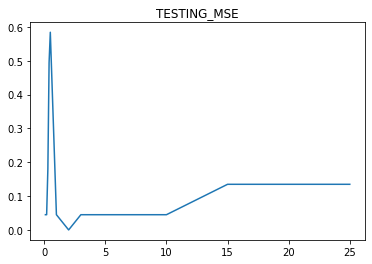

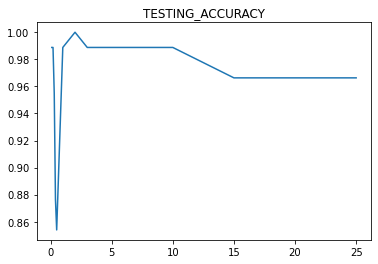

In [7]:
#Plotting Graphs   
plt.plot(sigma_list,MSE)
plt.title("TESTING_MSE")
plt.show()
plt.plot(sigma_list,accuracy)
plt.title("TESTING_ACCURACY")
plt.show()

Radial Based Function transforms lower dimensional space input data into high dimensional space so that it will be easier to classify. we are appling gaussion function for the non-linear transformation of the data. In the centers are determined using K-Means clustering and then the supervised method is applied in identifying weights.

Intially we implemeted with all the input datapoints as centers(352). The sigma value specifies the width, Here we have tried with different sigma value in implementing the gaussion function. we got the accuracy of 100% with sigma=2. So we choose sigma of 2 in implementing the Random and K-means 150 centers. We plotted the graphs of Mean Square Error and Accuracy with different sigma values(speed). We find that The accuracies of most of the sigma values aroung 2 are 98.88%(~99%) and we got the same accuracy at sigma of 0.1 and 0.2. However in multiple runs the accuracy at lower sigma values is not consistent. 

In particular executions we found that at higher sigma values (>15) the accuracies are better when compared to the sigma values between 0 and 1(<1). In multiple excetuions they are not consistant which may leads to loss of information with the radial function ranges away from the original range and the accuracy is getting saturated.  

We implemet the next part with the optimal with of 2(sigma).

### 2) a. Taking 150 Random Centers

In [14]:
#getting random centers
random_indices = np.random.choice(train_x.shape[0], size=150, replace=False)
Random_centers = train_x[random_indices,:]
best_sigma = 2

In [15]:
# For testing kindly change the sigma value for w_150 and y_value_150
weight_R150 = weight(train_x,Random_centers,best_sigma,train_y)
y_pred_R150 = np.sign(output(test_x,Random_centers,best_sigma,weight_R150))
MSE_R150= np.square(test_y - y_pred_R150).mean()
accuracy_R150 = np.mean(test_y == y_pred_R150)

In [16]:
print("The Mean Square Error for taking 150 random centers with sigma =",best_sigma," is ",MSE_R150)
print("The Accuracy for taking 150 random centers with sigma =",best_sigma," is ",accuracy_R150*100)

The Mean Square Error for taking 150 random centers with sigma = 2  is  0.0
The Accuracy for taking 150 random centers with sigma = 2  is  100.0


### 2) b. K-Means algorithm to find the 150 centers.

In [17]:
kmeans = KMeans(n_clusters=150)
y_kmeans=kmeans.fit(train_x)
kmean_center=kmeans.cluster_centers_

In [18]:
# For testing kindly change the sigma value for w_k_150 and y_value_k_150
weight_K150= weight(train_x,kmean_center,best_sigma,train_y) 
y_pred_K150= np.sign(output(test_x,kmean_center,best_sigma,weight_K150))
MSE_K150= np.square(test_y - y_pred_K150).mean()
accuracy_K150 = np.mean(test_y == y_pred_K150)

In [19]:
print("The Mean Square Error for taking 150 kmean centers with sigma =",best_sigma," is ",MSE_K150)
print("The Accuracy for taking 150 kmean centers with sigma =",best_sigma,"is ",accuracy_K150*100)

The Mean Square Error for taking 150 kmean centers with sigma = 2  is  0.0
The Accuracy for taking 150 kmean centers with sigma = 2 is  100.0


#### Result
The above result shows that the random intilization and K-means clustering of 150 centers from the entire 352 training data points. Sometimes the performace is better when compared to K_means and sometimes K-means performs better. But in this run the performance is same with K-means of 100% accuracy in both the casses.

The accuray with 150 centers(in random selection and by K-mens cluster centers) the accurracy is 100% same when compared with the accuracy at 352 center poins in part-1, However sometimes the accuracy is dropping with reducing the number of centers. For optimal performace the hidden layer (i.e) the number of non linear transformation used should be equal to the input data.

The main intution behind RBF is transforming low dimensional data to high dimensional space for better linear seperability. In general, if all the inputs are used as the cluster centers the seperability of the data in high. This helps in interpolation of the network.